In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Checking for any Null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:

sex = {
    'female' :0,
    'male' : 1
}
smoke = {
    'yes' : 0,
    'no' : 1
}

In [8]:
df['gender'] = df['sex'].map(sex)
df['smmoking'] = df['smoker'].map(smoke)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender,smmoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C62237088>,
      dtype=object)

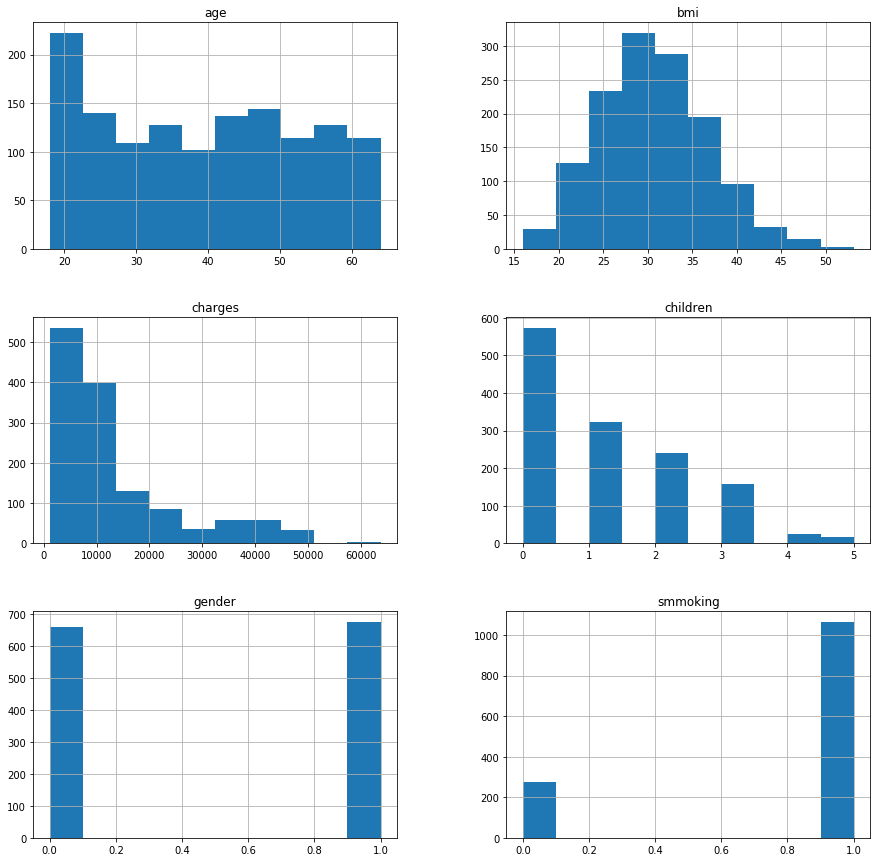

In [10]:
df.hist(figsize=(15,15))

In [11]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df.region.size

1338

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender,smmoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1


In [14]:
df.drop(['sex','smoker'], axis=1, inplace=True)

In [15]:
df.head()

,age,bmi,children,region,charges,gender,smmoking
0,19,27.900,0,southwest,16884.92400,0,0
1,18,33.770,1,southeast,1725.55230,1,1
2,28,33.000,3,southeast,4449.46200,1,1
3,33,22.705,0,northwest,21984.47061,1,1
4,32,28.880,0,northwest,3866.85520,1,1


### Feature Selection

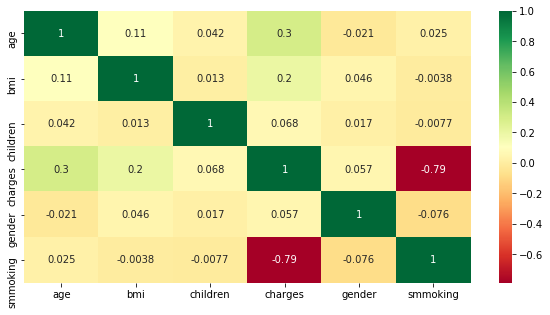

In [16]:
# Heatmap
corrmat= df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corrmat, annot=True,cmap='RdYlGn')
plt.show()

## One Hot Encoding the categorical Features

In [17]:
list = list(df['region'])

In [18]:
data = pd.get_dummies(list)

In [19]:
data

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [20]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
df = pd.concat([df,data], axis=1 )

In [22]:
df.head()

,age,bmi,children,region,charges,gender,smmoking,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,0,0,0,0,0,1
1,18,33.770,1,southeast,1725.55230,1,1,0,0,1,0
2,28,33.000,3,southeast,4449.46200,1,1,0,0,1,0
3,33,22.705,0,northwest,21984.47061,1,1,0,1,0,0
4,32,28.880,0,northwest,3866.85520,1,1,0,1,0,0


In [23]:
df.drop(['region'], axis=1, inplace=True)

In [24]:
df.head()

,age,bmi,children,charges,gender,smmoking,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,0,0,0,0,1
1,18,33.770,1,1725.55230,1,1,0,0,1,0
2,28,33.000,3,4449.46200,1,1,0,0,1,0
3,33,22.705,0,21984.47061,1,1,0,1,0,0
4,32,28.880,0,3866.85520,1,1,0,1,0,0


In [25]:
data = df.copy()

In [26]:
y = df['charges']
data.drop(['charges'], axis=1, inplace=True)

In [27]:
X = data.copy()
X.head()

,age,bmi,children,gender,smmoking,northeast,northwest,southeast,southwest
0,19,27.900,0,0,0,0,0,0,1
1,18,33.770,1,1,1,0,0,1,0
2,28,33.000,3,1,1,0,0,1,0
3,33,22.705,0,1,1,0,1,0,0
4,32,28.880,0,1,1,0,1,0,0


In [28]:
y.shape

(1338,)

#### Normalising the data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###  Logistic Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = lr.predict(X_test)

In [35]:
# Accuracy Score
lr.score(X_test, y_test)

0.767668674547013

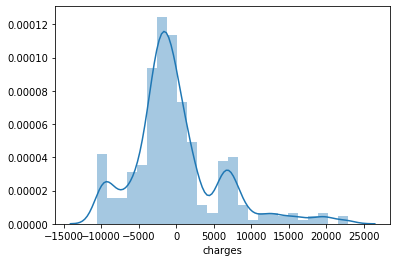

In [36]:
#Probability Density Function
sns.distplot(y_test-y_pred)

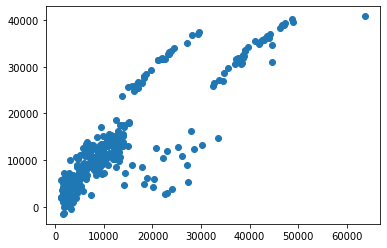

In [37]:
plt.scatter(y_test,y_pred)

### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [39]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
y_pred = dtr.predict(X_test)

In [41]:
dtr.score(X_test,y_test)

0.7382894334378776

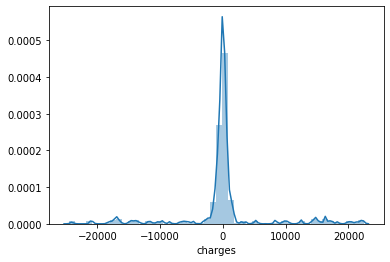

In [42]:
#Probability Density Function
sns.distplot(y_test-y_pred)

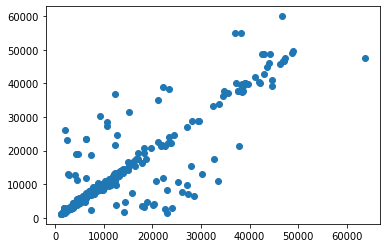

In [43]:
plt.scatter(y_test,y_pred)